# Backtest: Strategy vs Buy & Hold

Compares RSI+MACD and LogReg strategies against Buy & Hold on SPY.

In [10]:
import sys
sys.path.append('..')

import yfinance as yf
import matplotlib.pyplot as plt
import yfinance_fix

from tradbot.signals.signal_rsi_macd import generate_strategy as rsi_strategy
from tradbot.signals.signal_logreg import generate_strategy as logreg_strategy
from tradbot.backtest import Backtest

df = yf.download("SPY", period="5y", session=yfinance_fix.chrome_session)
df.columns = df.columns.get_level_values(0)
print(f"{len(df)} rows loaded")

[yfinance_fix] Patch erfolgreich angewendet.
[yfinance_fix] Chrome-Session erstellt.


[*********************100%***********************]  1 of 1 completed

1256 rows loaded


## 1. RSI + MACD Strategy

In [11]:
bt_rsi = Backtest(rsi_strategy(df))
bt_rsi.run()
bt_rsi.print_summary()

Metric                   Strategy     Buy&Hold
----------------------------------------------
Total Return              -1.28%      89.95%
Sharpe Ratio               -1.317        0.730
Max Drawdown              -4.30%     -24.50%
VaR 95%                   0.0000     -0.0166
Ann. Return               -0.25%      14.49%
Ann. Volatility            1.71%      17.10%


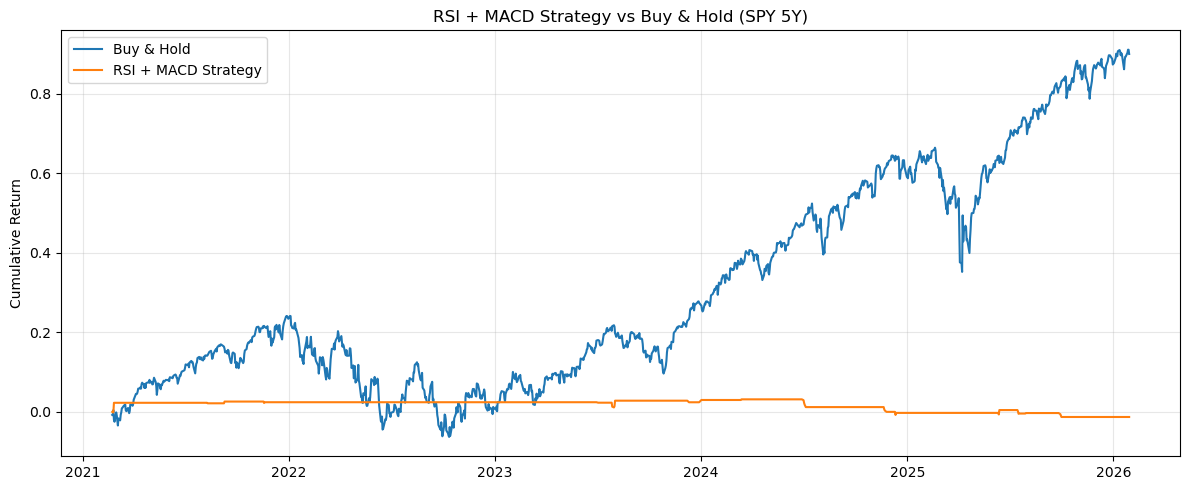

In [12]:
# Plot: Cumulative Returns
result = bt_rsi.get_df()

plt.figure(figsize=(12, 5))
plt.plot(result["asset_cum_returns"], label="Buy & Hold")
plt.plot(result["strategy_cum_returns"], label="RSI + MACD Strategy")
plt.legend()
plt.title("RSI + MACD Strategy vs Buy & Hold (SPY 5Y)")
plt.ylabel("Cumulative Return")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [13]:
# Signal distribution
result["Strategy"].value_counts().sort_index().rename(
    index={-1.0: "Short", 0.0: "Flat", 1.0: "Long"}
)

Strategy
Short      32
Flat     1210
Name: count, dtype: int64

## 2. Logistic Regression Strategy

In [14]:
bt_logreg = Backtest(logreg_strategy(df, shift=5, threshold=0.55))
bt_logreg.run()
bt_logreg.print_summary()

Train: 862 rows | Test: 370 rows
AUC: 0.5533
Metric                   Strategy     Buy&Hold
----------------------------------------------
Total Return              19.04%      89.46%
Sharpe Ratio                0.252        0.734
Max Drawdown             -15.35%     -24.50%
VaR 95%                  -0.0041     -0.0166
Ann. Return                3.84%      14.55%
Ann. Volatility            7.31%      17.09%


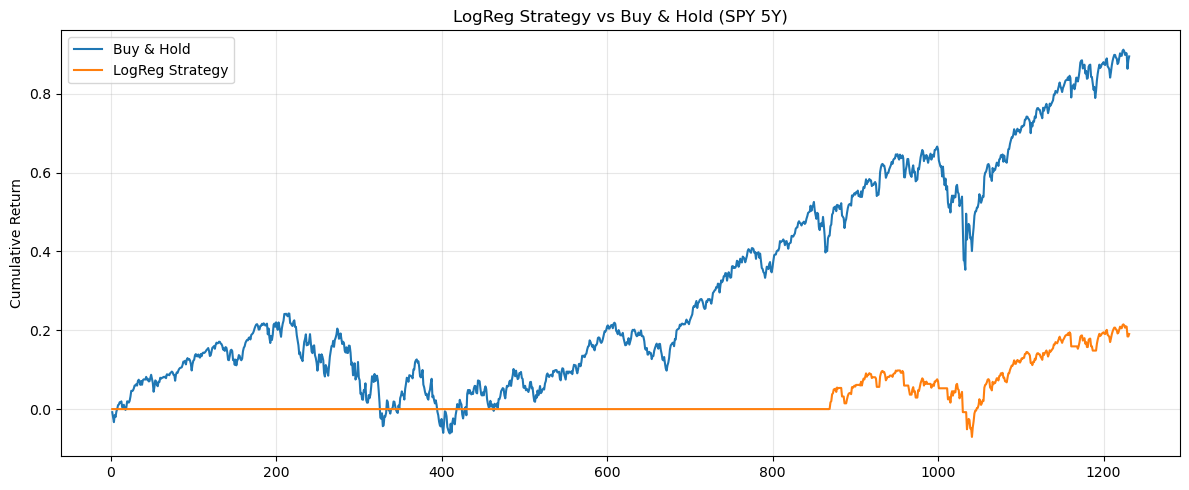

In [15]:
# Plot: Cumulative Returns
result2 = bt_logreg.get_df()

plt.figure(figsize=(12, 5))
plt.plot(result2["asset_cum_returns"], label="Buy & Hold")
plt.plot(result2["strategy_cum_returns"], label="LogReg Strategy")
plt.legend()
plt.title("LogReg Strategy vs Buy & Hold (SPY 5Y)")
plt.ylabel("Cumulative Return")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [16]:
# Signal distribution (LogReg)
result2["Strategy"].value_counts().sort_index().rename(
    index={-1.0: "Short", 0.0: "Flat", 1.0: "Long"}
)

Strategy
Flat    930
Long    301
Name: count, dtype: int64

## 3. Comparison: Both Strategies

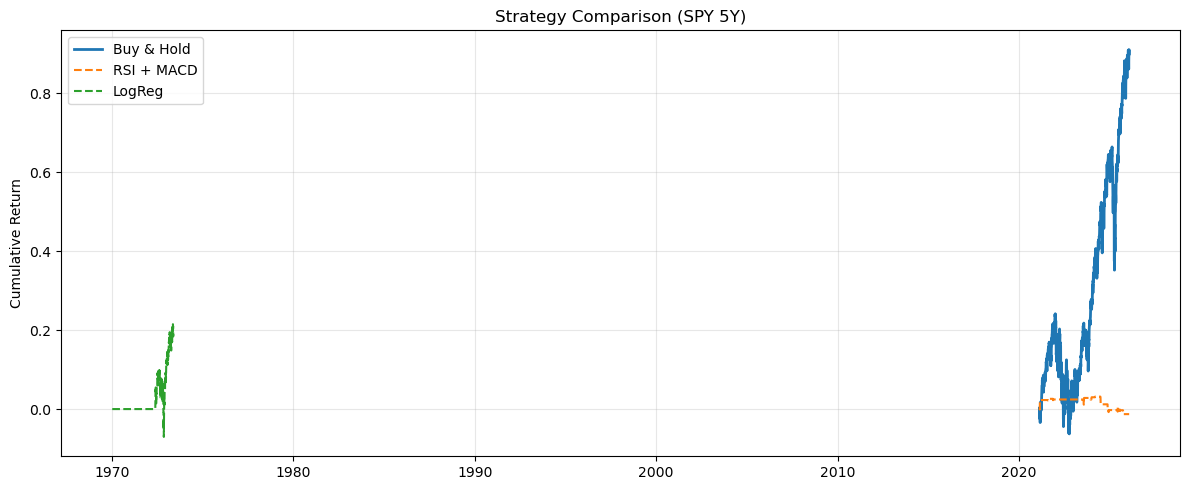

In [17]:
plt.figure(figsize=(12, 5))
plt.plot(result["asset_cum_returns"], label="Buy & Hold", linewidth=2)
plt.plot(result["strategy_cum_returns"], label="RSI + MACD", linestyle="--")
plt.plot(result2["strategy_cum_returns"], label="LogReg", linestyle="--")
plt.legend()
plt.title("Strategy Comparison (SPY 5Y)")
plt.ylabel("Cumulative Return")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()